In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikhsanalfajar","key":"cd943f889af08e53aeff1b694cee17f6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d asaniczka/wages-by-education-in-the-usa-1973-2022

  0% 0.00/7.26k [00:00<?, ?B/s]
100% 7.26k/7.26k [00:00<00:00, 16.8MB/s]


In [4]:
!mkdir wages-by-education-in-the-usa-1973-2022
!unzip wages-by-education-in-the-usa-1973-2022.zip -d wages-by-education-in-the-usa-1973-2022
!ls wages-by-education-in-the-usa-1973-2022

Archive:  wages-by-education-in-the-usa-1973-2022.zip
  inflating: wages-by-education-in-the-usa-1973-2022/wages_by_education.csv  
wages_by_education.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('wages-by-education-in-the-usa-1973-2022/wages_by_education.csv')

In [7]:
df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

<Axes: >

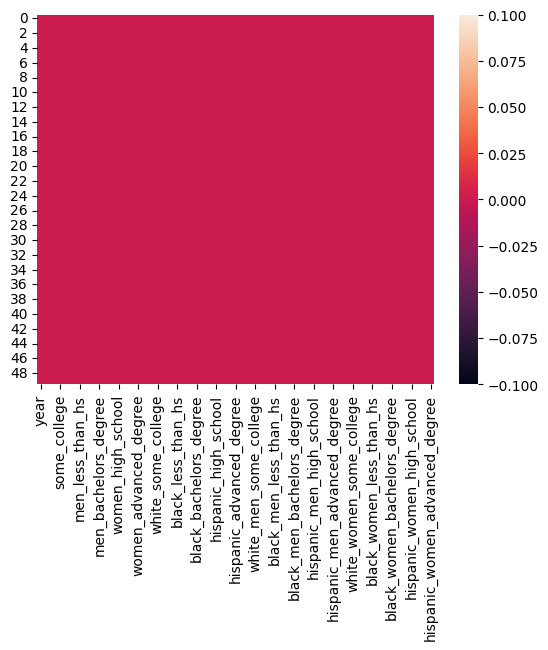

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,1997.50000,15.702600,20.876600,23.219200,34.768600,43.899000,17.565200,23.832600,26.333800,39.988400,...,12.77180,16.461400,18.960400,27.924400,36.186200,12.808200,16.597600,18.963600,26.487400,34.75360
std,14.57738,1.125252,0.742743,0.776425,3.306645,5.305794,1.638445,1.225697,0.897943,3.734945,...,0.46448,0.700854,0.733991,2.417531,3.123264,0.752798,0.685984,0.954833,3.219796,5.20913
min,1973.00000,13.950000,19.620000,22.040000,30.040000,35.320000,15.390000,22.110000,24.780000,35.160000,...,11.77000,15.530000,17.710000,23.540000,29.340000,11.350000,15.530000,17.040000,18.850000,20.93000
25%,1985.25000,14.885000,20.392500,22.545000,31.875000,38.757500,16.250000,22.945000,25.800000,36.605000,...,12.45000,15.862500,18.412500,25.985000,33.870000,12.275000,16.115000,18.292500,24.237500,30.95500
50%,1997.50000,15.340000,20.855000,23.185000,34.205000,44.085000,16.905000,23.695000,26.365000,39.485000,...,12.78000,16.300000,18.790000,28.515000,37.160000,12.725000,16.465000,18.930000,27.390000,36.08500
75%,2009.75000,16.497500,21.480000,23.697500,37.122500,47.557500,18.610000,24.307500,27.012500,42.340000,...,13.02750,16.992500,19.580000,30.110000,38.312500,13.075000,16.982500,19.645000,28.702500,38.37000
max,2022.00000,18.060000,22.700000,25.440000,41.650000,53.740000,21.180000,26.900000,28.550000,49.010000,...,13.89000,18.300000,20.450000,31.380000,42.440000,14.970000,18.500000,21.140000,31.550000,44.15000


<Axes: >

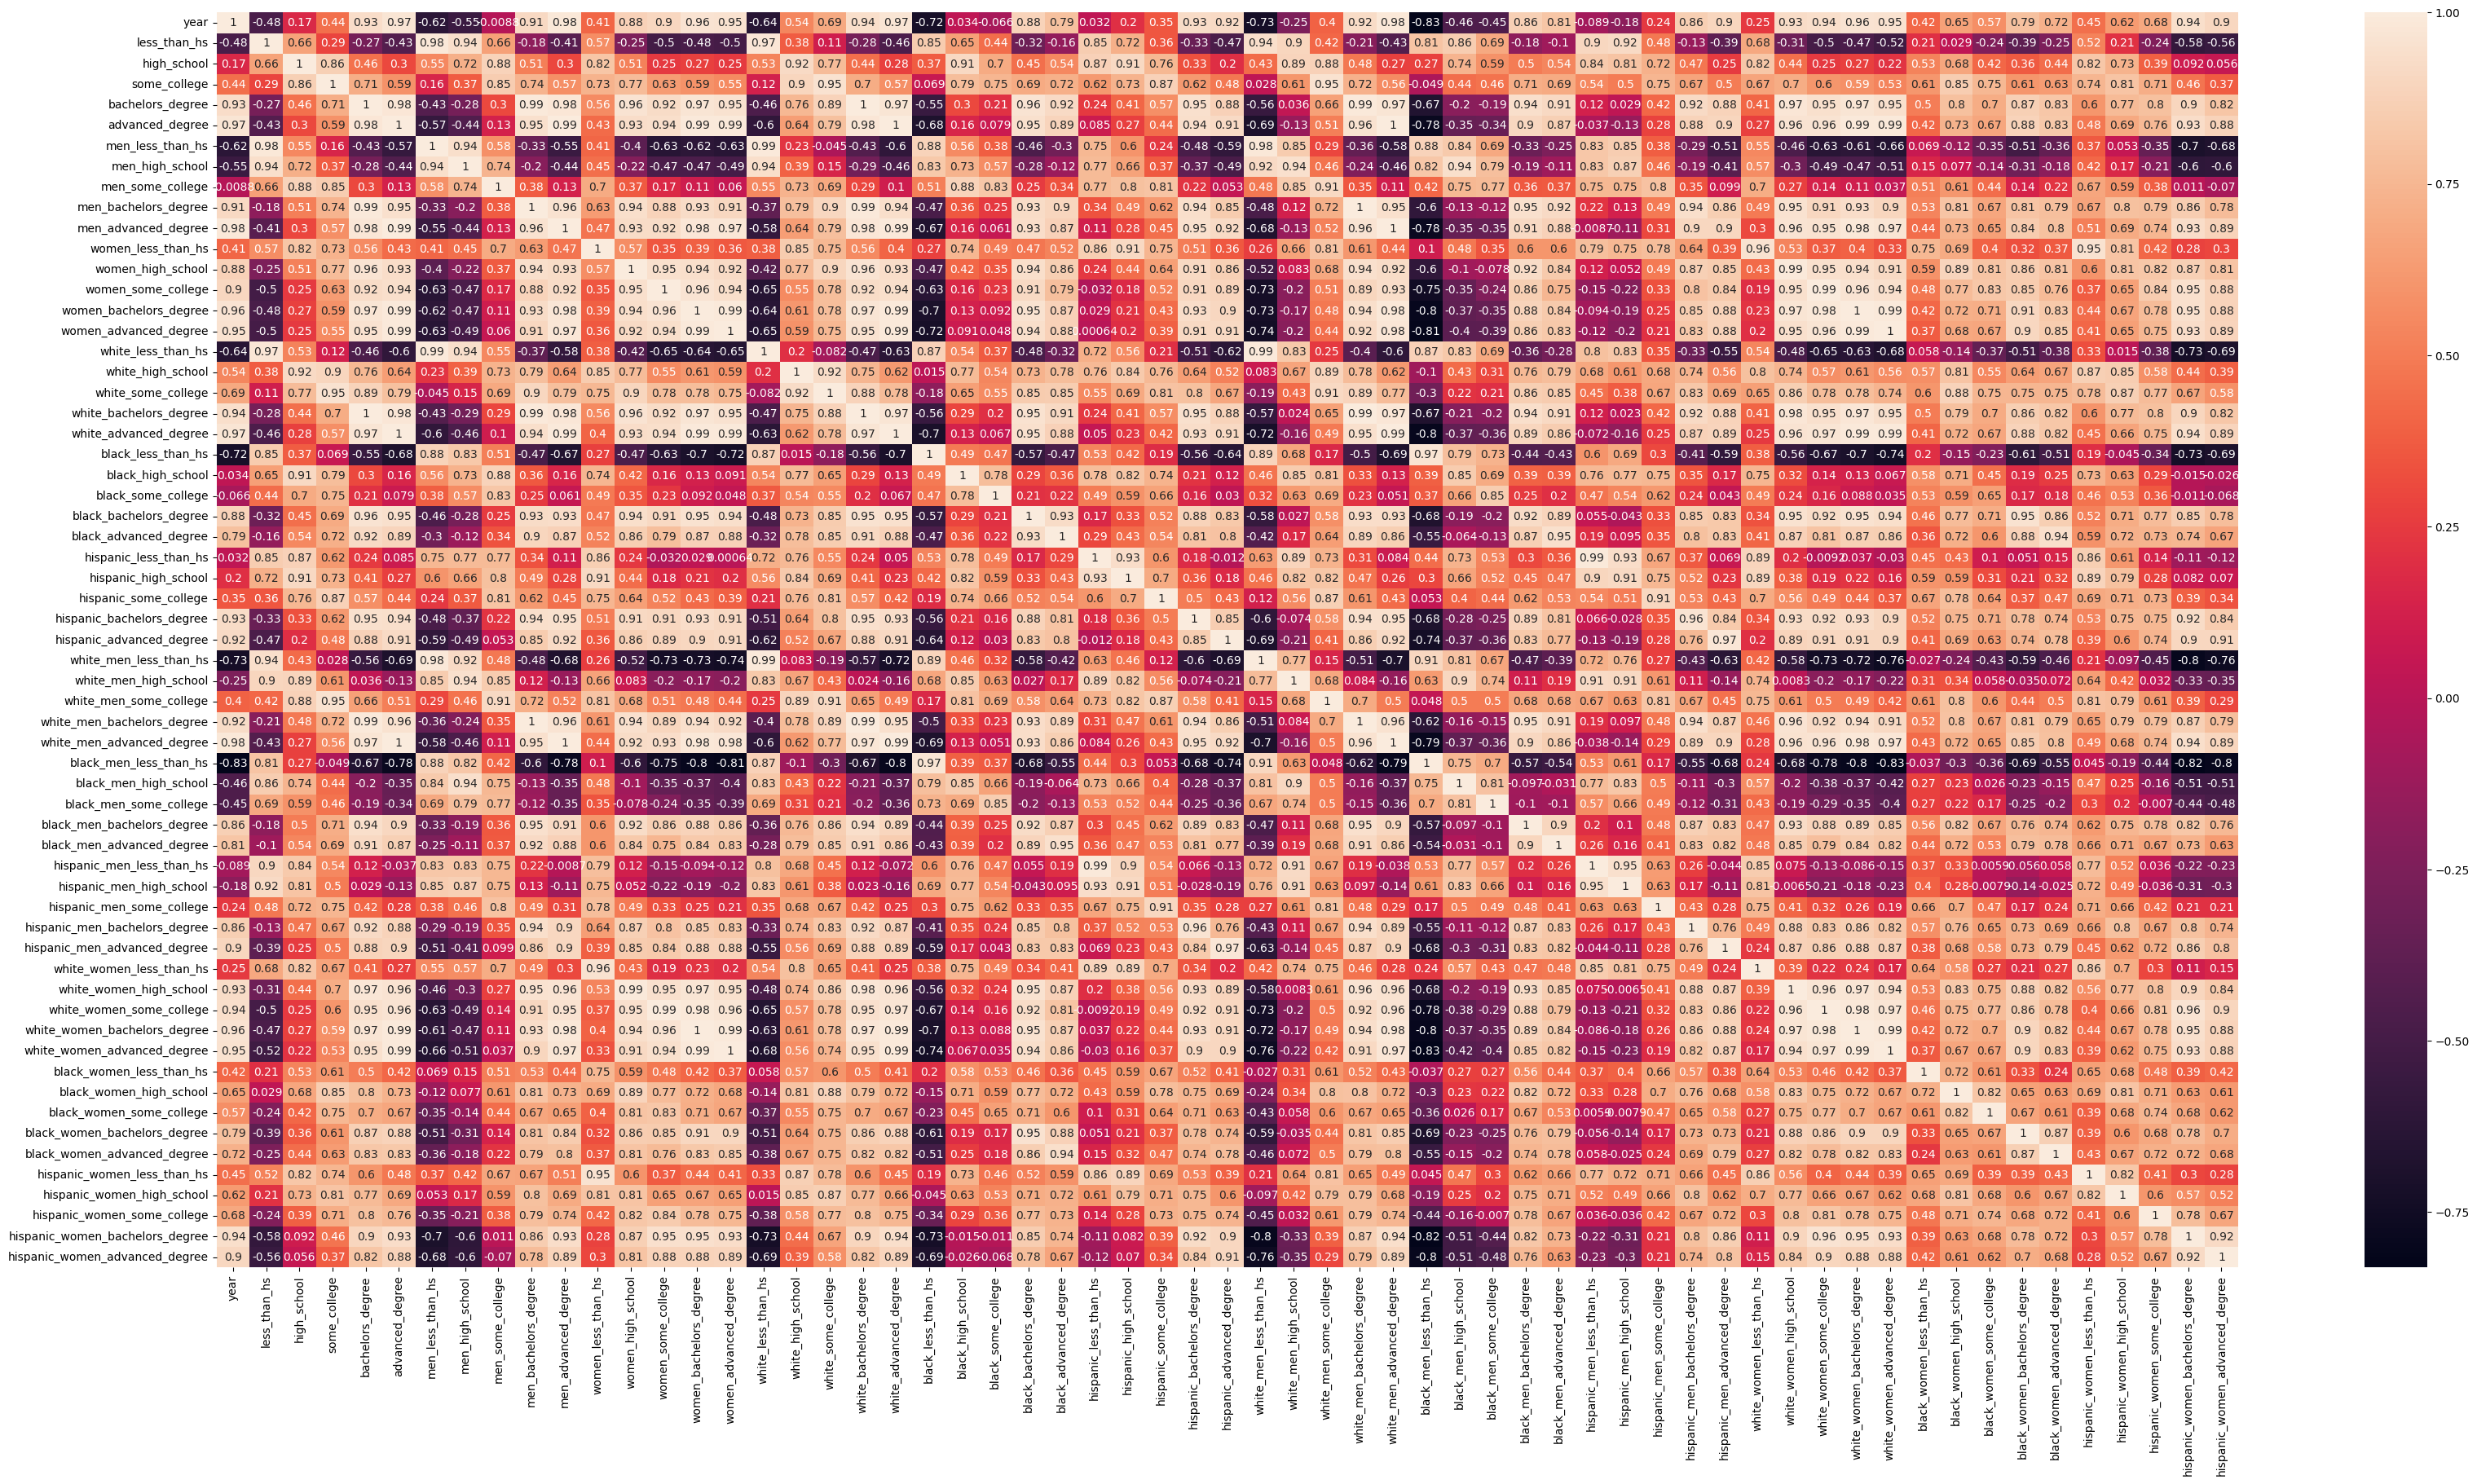

In [16]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True)

In [17]:
high_school = df.groupby('men_high_school').count()[['high_school']].sort_values(by='high_school').reset_index()
high_school = high_school.rename(columns={'high_school':'school'})

<Axes: xlabel='men_high_school', ylabel='school'>

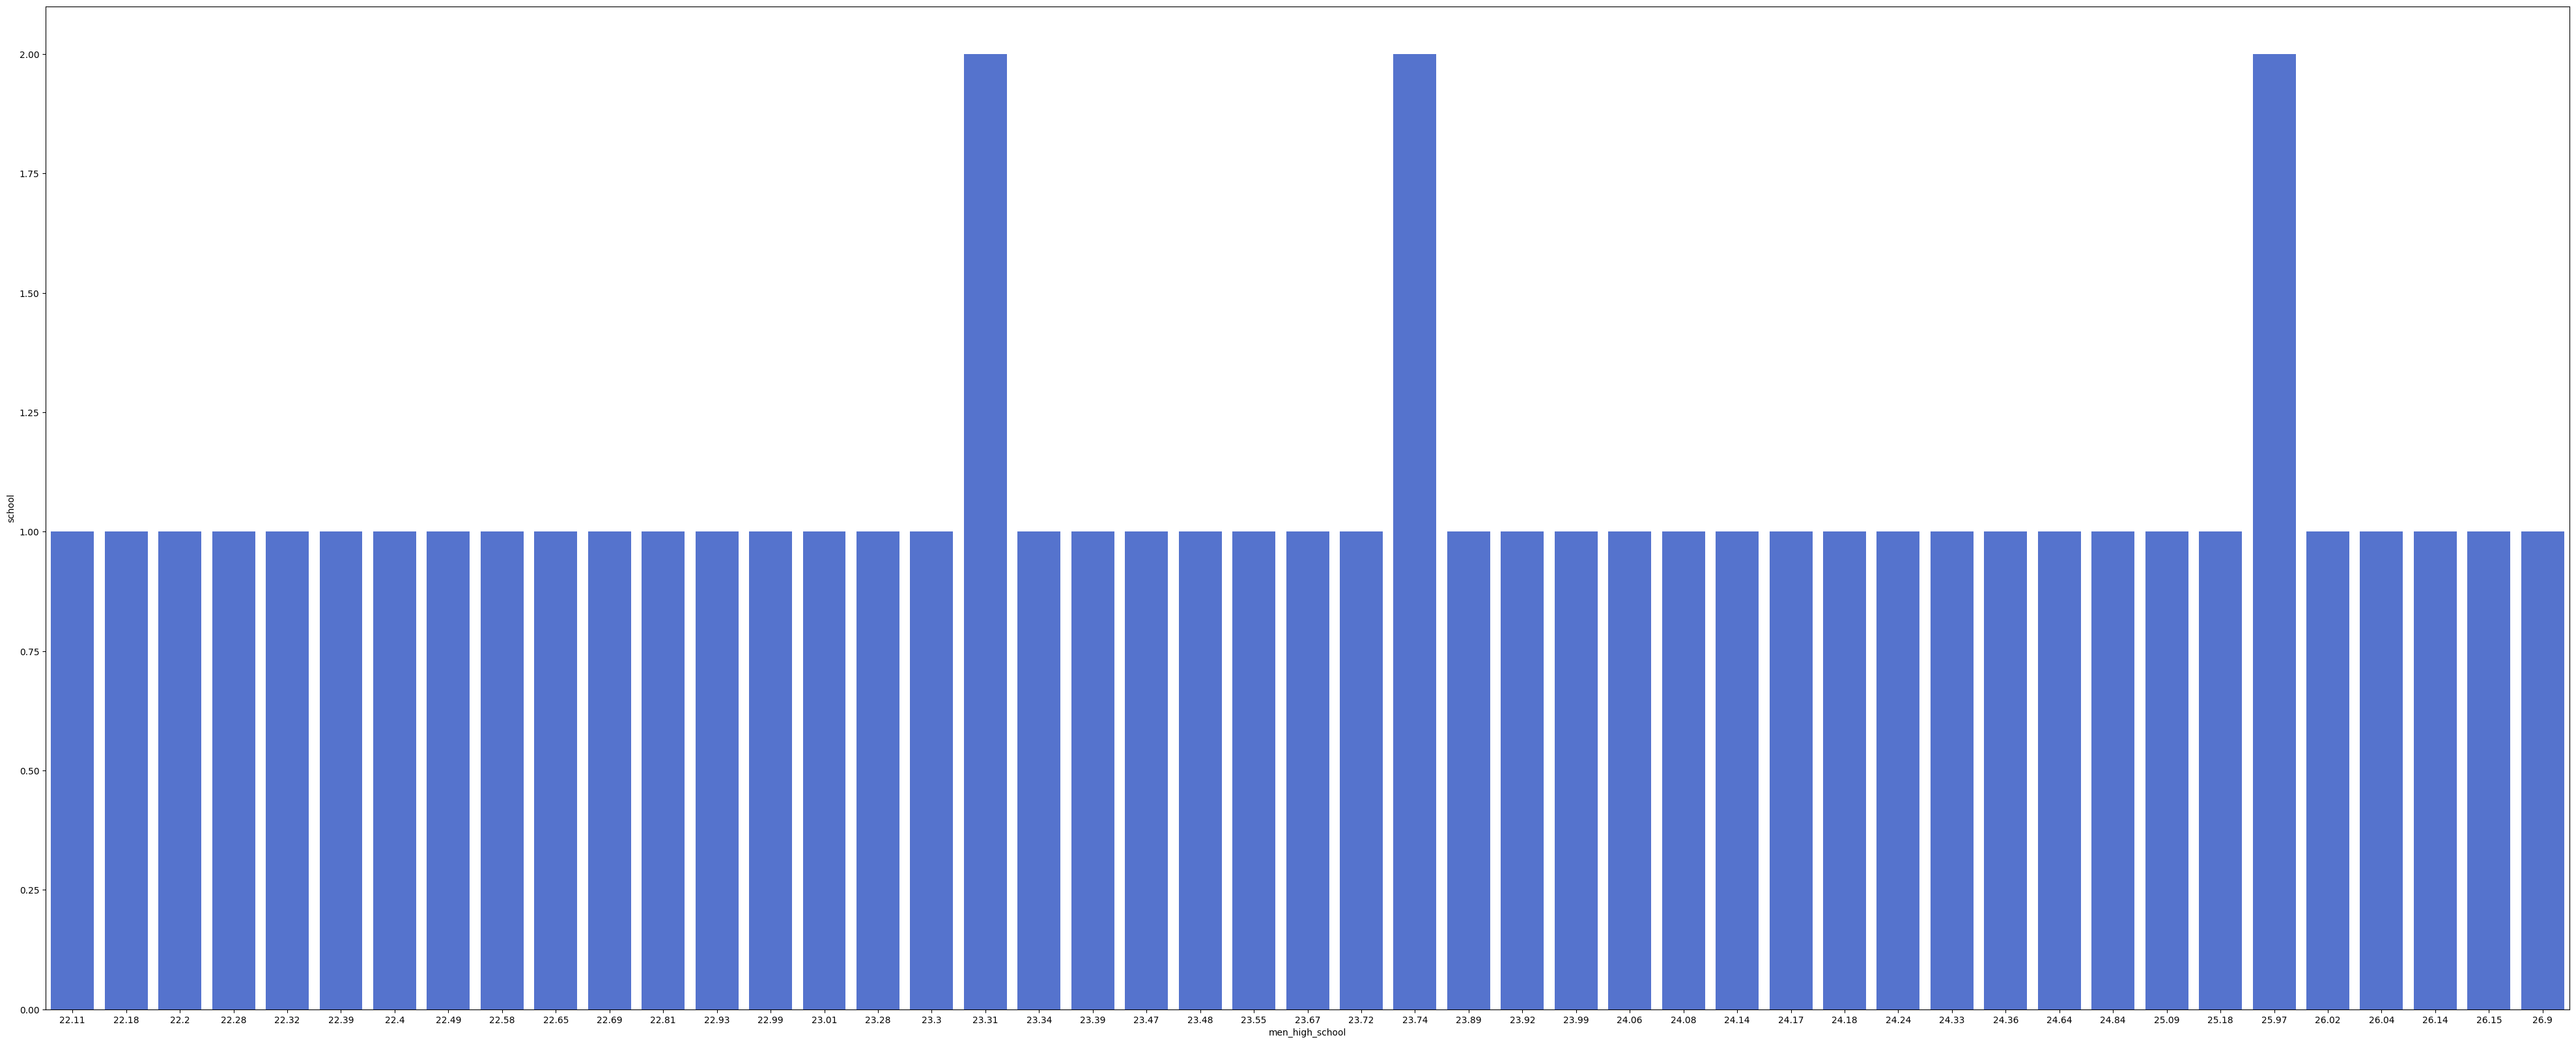

In [18]:
plt.figure(figsize=(50,20))
sns.barplot(x=high_school['men_high_school'], y=high_school['school'], color='royalblue')

In [28]:
advanced_degree = df.groupby('women_advanced_degree').count()[['advanced_degree']].sort_values(by='advanced_degree',ascending=True).reset_index()
advanced_degree = advanced_degree.rename(columns={'advanced_degree':'advenced'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '28.47'),
  Text(1, 0, '28.51'),
  Text(2, 0, '28.81'),
  Text(3, 0, '28.83'),
  Text(4, 0, '29.65'),
  Text(5, 0, '30.0'),
  Text(6, 0, '30.33'),
  Text(7, 0, '30.55'),
  Text(8, 0, '30.78'),
  Text(9, 0, '30.9'),
  Text(10, 0, '31.05'),
  Text(11, 0, '32.03'),
  Text(12, 0, '32.14'),
  Text(13, 0, '32.69'),
  Text(14, 0, '32.73'),
  Text(15, 0, '32.97'),
  Text(16, 0, '33.14'),
  Text(17, 0, '33.54'),
  Text(18, 0, '34.11'),
  Text(19, 0, '34.82'),
  Text(20, 0, '35.48'),
  Text(21, 0, '37.21'),
  Text(22, 0, '37.61'),
  Text(23, 0, '37.8'),
  Text(24, 0, '38.13'),
  Text(25, 0, '38.56'),
  Text(26, 0, '39.36'),
  Text(27, 0, '39.94'),
  Text(28, 0, '40.32'),
  Text(29, 0, '40.34'),
  Text(30, 0, '40.38'),
  Text(31, 0, '40.39'),
  Text(32, 0, '40.46'),

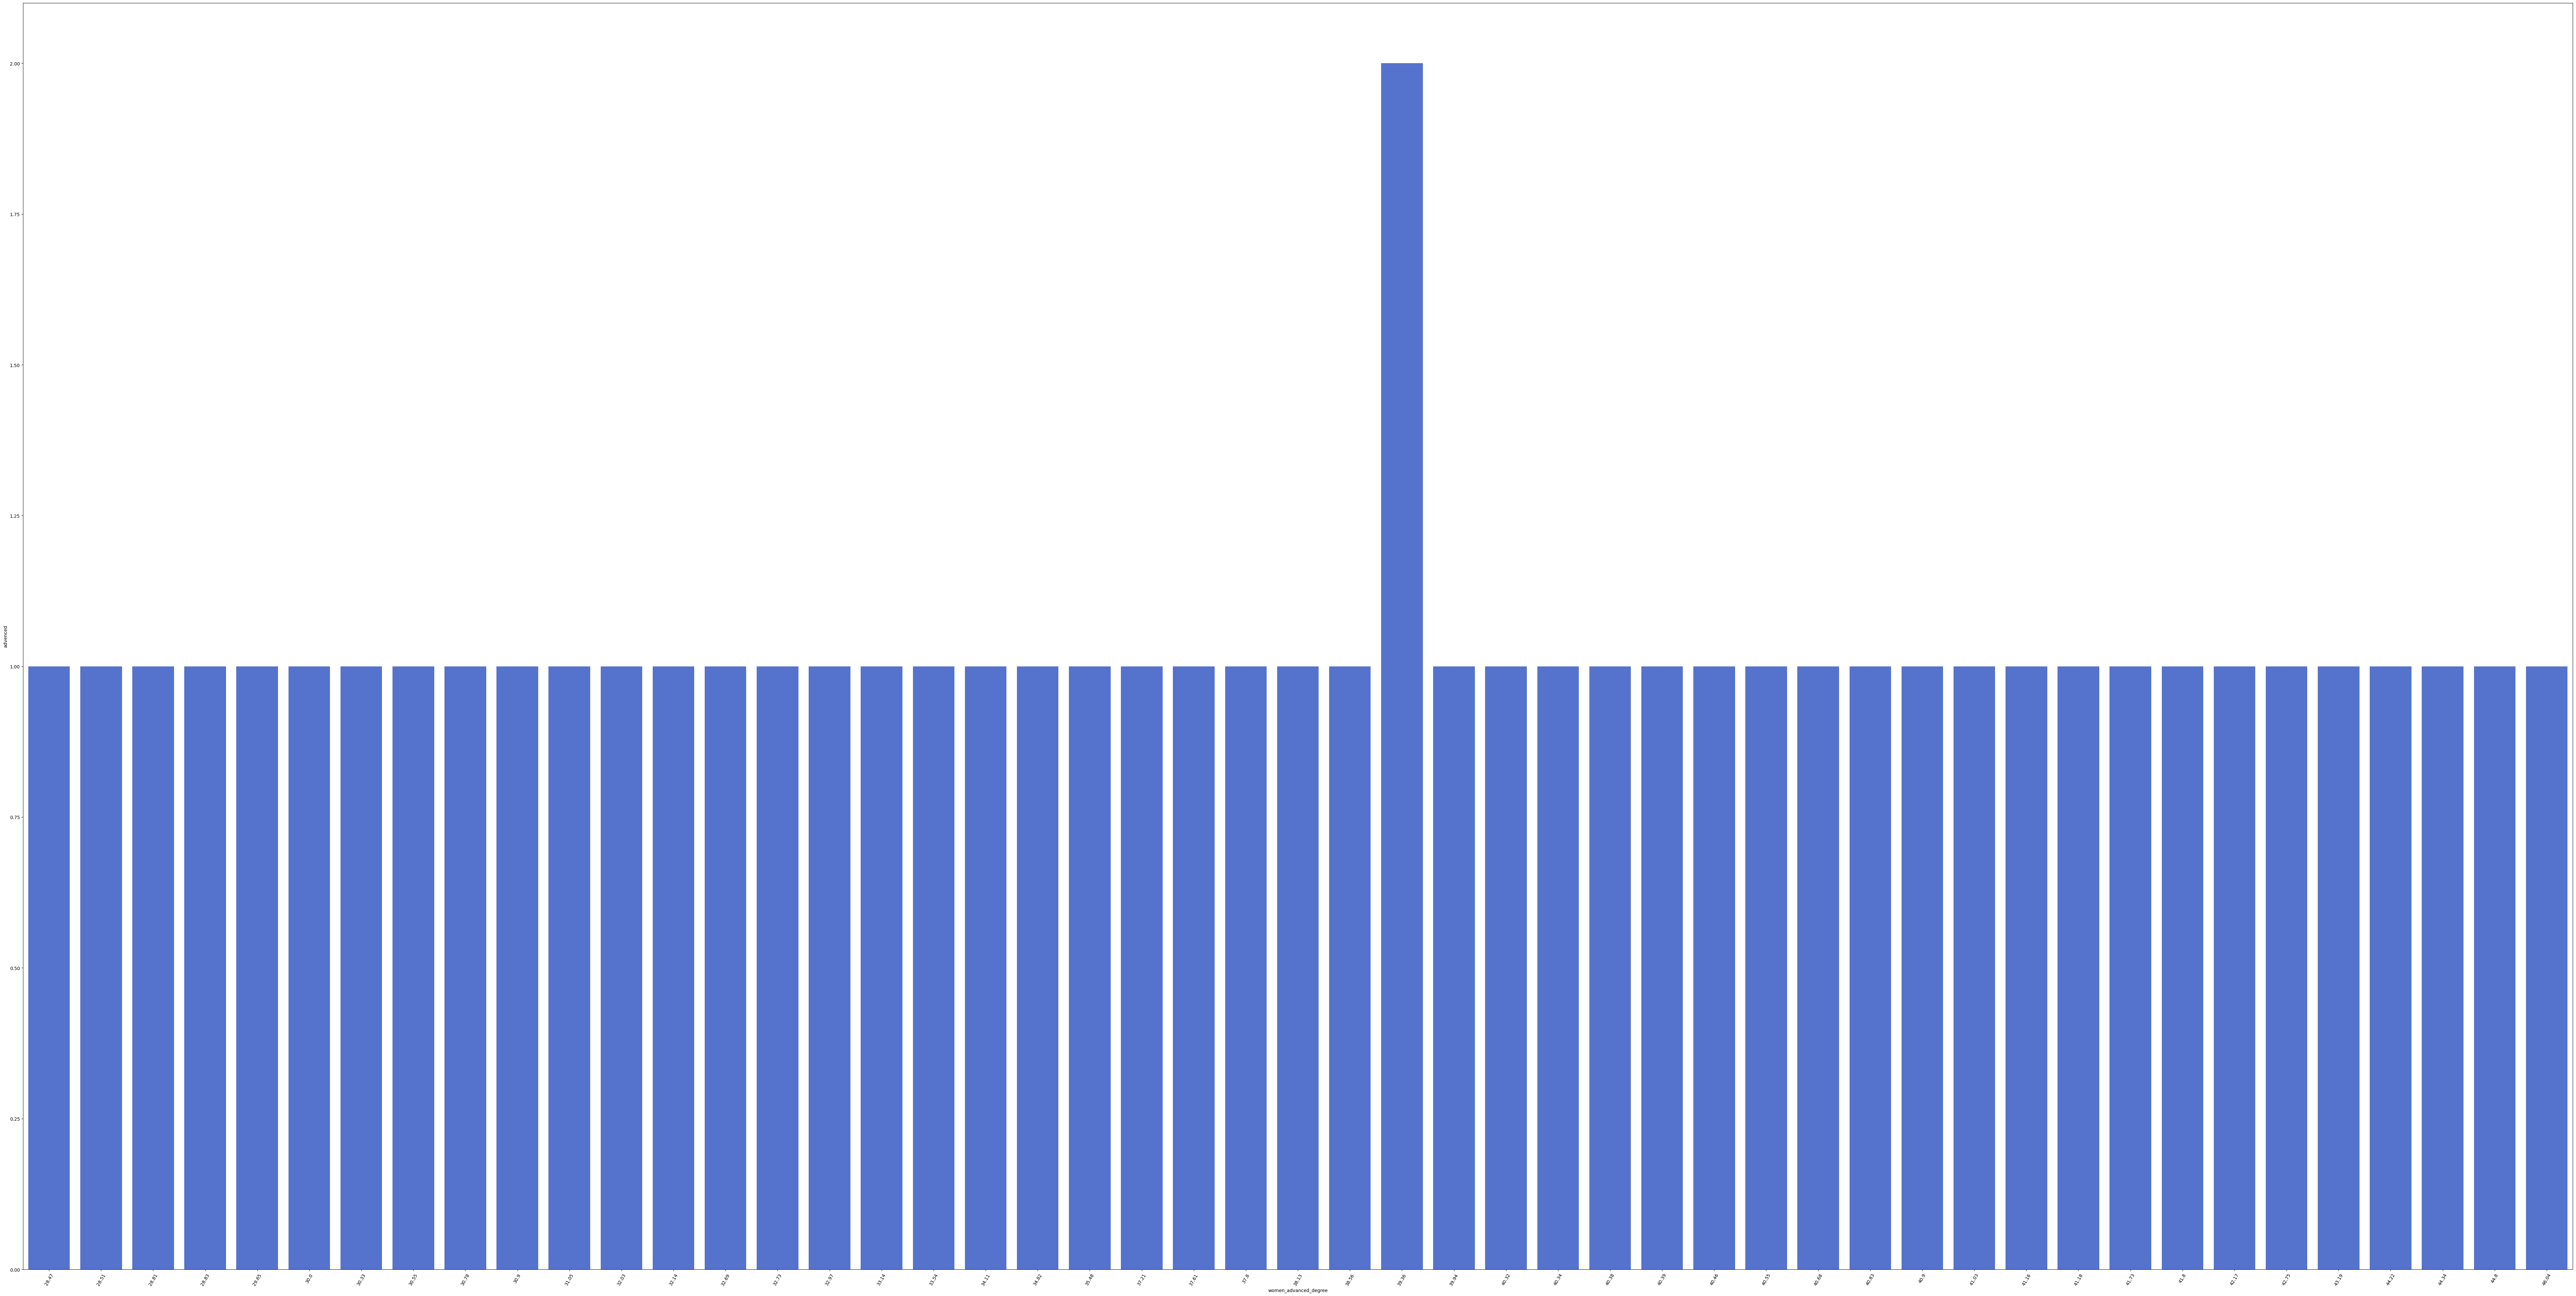

In [29]:
fig = plt.figure(figsize=(100,50))
sns.barplot(x=advanced_degree['women_advanced_degree'], y=advanced_degree['advenced'], color='royalblue')
plt.xticks(rotation=60)

In [9]:
features = ['year','less_than_hs','high_school','some_college','advanced_degree','men_less_than_hs','men_high_school','men_some_college','men_bachelors_degree','men_advanced_degree','women_less_than_hs','women_high_school','women_some_college','women_bachelors_degree','women_advanced_degree']
x = df[features]
y = df['bachelors_degree']
x.shape, y.shape

((50, 15), (50,))

In [10]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(13,)

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [12]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9997690717252785


In [30]:
input_data = np.array([[2021,16.74,22.28,24.92,53.45,18.34,24.36,27.96,47.83,63.52,14.36,19.36,21.97,35.08,44.8]])

prediction = lr.predict(input_data)
print('Estimasi bachelors degree education :', prediction)

Estimasi bachelors degree education : [41.29558405]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
import pickle

filename = 'estimasi-wages-by-education-in-the-usa.sav'
pickle.dump(lr,open(filename,'wb'))

In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9997690717252785
